In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import feature_selection
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
df = pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.shape

(209593, 37)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# Droping unused columns
df.drop(['Unnamed: 0','pdate','msisdn'],axis=1,inplace=True)

In [8]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [10]:
df.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
dtype: int64

<AxesSubplot:>

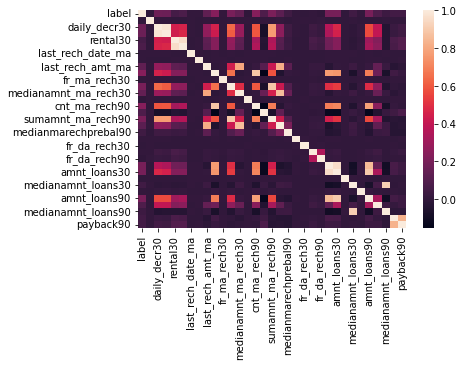

In [11]:
sns.heatmap(df.corr())

In [12]:
for one_column in df.columns:
    print('-' * 40 + one_column + '-' * 40)
    print(df[one_column].value_counts())

----------------------------------------label----------------------------------------
1    183431
0     26162
Name: label, dtype: int64
----------------------------------------aon----------------------------------------
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64
----------------------------------------daily_decr30----------------------------------------
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
36.098000          1
75.915000          1
9.516667           1
21078.677000       1
4489.362000        1
Name: daily_decr30, Length: 147025, dtype: int64
----------------------------------------daily_decr90----------------------------------------
0.000       4063
500.000      781
1000.000   

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
13710.643665         1
84844.562846         1
65385.403518         1
93840.663070         1
61002.421345         1
Name: cnt_da_rech30, Length: 1066, dtype: int64
----------------------------------------fr_da_rech30----------------------------------------
0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
757900.530472         1
870976.477512         1
797647.001920         1
519699.885393         1
509386.302670         1
Name: fr_da_rech30, Length: 1072, dtype: int64
----------------------------------------cnt_da_rech90----------------------------------------
0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16    

Removing pcircle column because all belongs from one circle UPW

In [13]:
df.drop('pcircle',axis=1,inplace=True)

In [14]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [15]:
# Chanign dtypes
df['maxamnt_loans30'] = df['maxamnt_loans30'].astype('object')

In [16]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

Removing other than 6 and 12 

In [17]:
df.loc[
    (
        (df['maxamnt_loans30'] != 6.0) & 
        (df['maxamnt_loans30'] != 12.0) & 
        (df['maxamnt_loans30'] != 0.0)
    )
    ,'maxamnt_loans30'
] = 0

In [18]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [20]:
df = abs(df)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.00,1.000000
aon,209593.0,8112.808718,75696.032666,1.0,246.000000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.431293,9220.606472,0.0,42.453000,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.544140,10918.796572,0.0,42.693333,1500.000000,7802.79,320630.000000
rental30,209593.0,2715.376558,4294.257439,0.0,299.700000,1095.750000,3362.35,198926.110000
rental90,209593.0,3509.497148,5754.630600,0.0,330.000000,1347.220000,4204.51,200148.110000
last_rech_date_ma,209593.0,3756.125844,53905.872857,0.0,1.000000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.204801,53374.833299,0.0,0.000000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.0,770.000000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.0,1.000000,3.000000,5.00,203.000000


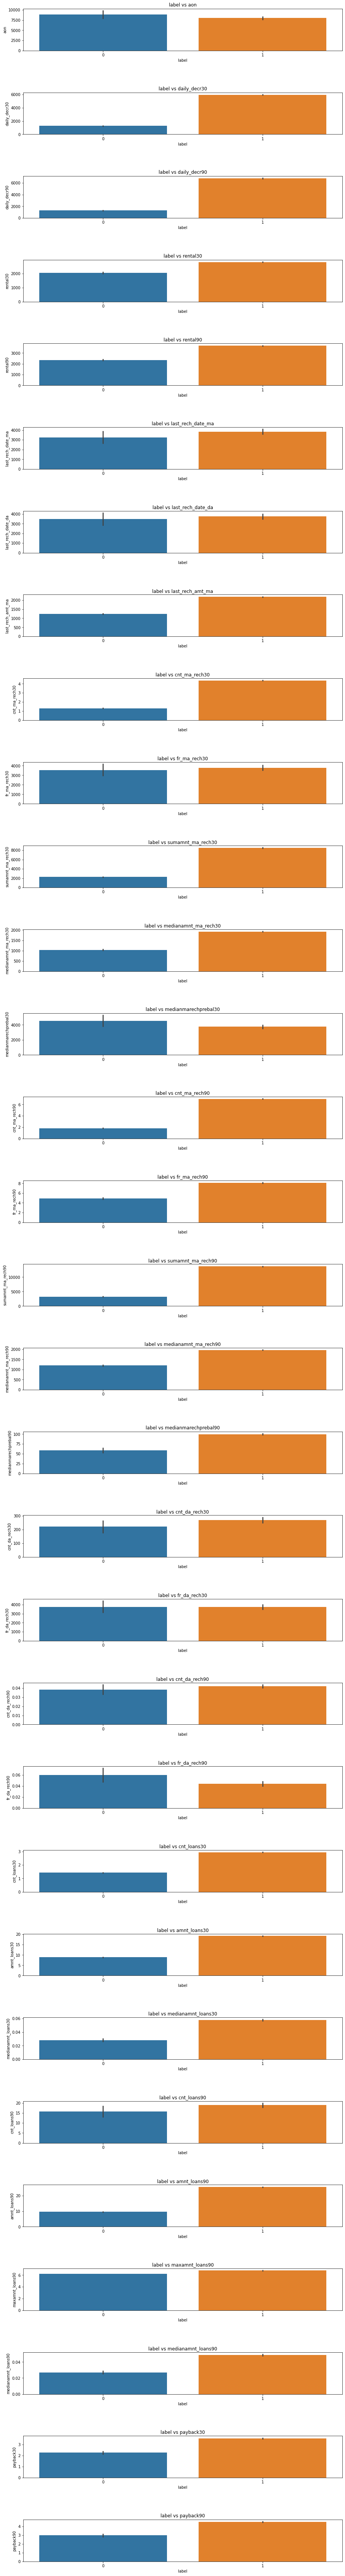

In [22]:
# # Bivariate Analysis
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop(['label'],axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(50,1,j+1)
        plt.subplots_adjust(hspace=1)
        plt.title('label vs '+column)
        sns.barplot(x=df['label'],y=df[column])
        j += 1

# Outlier check

<AxesSubplot:>

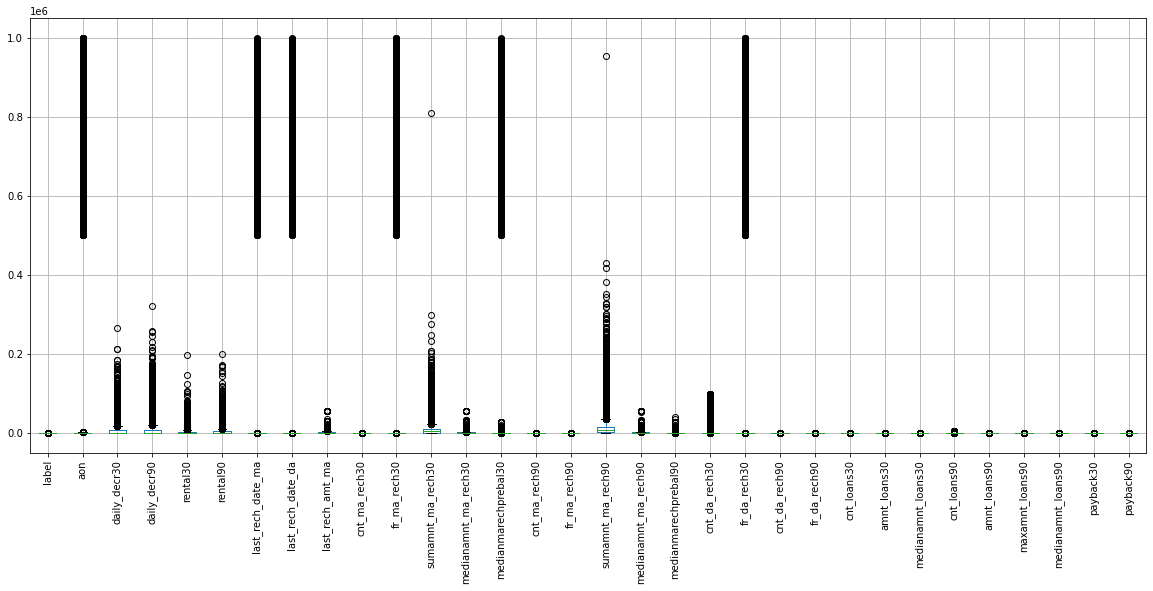

In [23]:
df.boxplot(figsize=(20,8),rot=90)

# Split X Y

In [24]:
X = df.drop('label',axis=1)
y = df['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True)

# Feature Importance 

In [26]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
pd.DataFrame({
    'value':X_train.columns,
    'Importance':randomForestClassifier.feature_importances_,
}).sort_values('Importance',ascending=False)

,value,Importance
2,daily_decr90,0.150236
1,daily_decr30,0.127639
0,aon,0.080921
3,rental30,0.075912
4,rental90,0.075431
15,sumamnt_ma_rech90,0.048796
17,medianmarechprebal90,0.046002
12,medianmarechprebal30,0.044356
10,sumamnt_ma_rech30,0.042348
5,last_rech_date_ma,0.042117


# Skew

In [28]:
X_train.skew().sort_values()

maxamnt_loans30          1.251472
maxamnt_loans90          1.686882
fr_ma_rech90             2.294282
cnt_loans30              2.704379
amnt_loans30             2.969707
amnt_loans90             3.119751
cnt_ma_rech30            3.515527
cnt_ma_rech90            3.593751
medianamnt_ma_rech30     3.687223
daily_decr30             3.957335
last_rech_amt_ma         3.990386
medianamnt_ma_rech90     4.096018
sumamnt_ma_rech90        4.097669
daily_decr90             4.202750
sumamnt_ma_rech30        4.207055
rental90                 4.369138
medianamnt_loans30       4.559114
rental30                 4.673261
medianamnt_loans90       4.891601
payback90                6.989321
payback30                8.406585
aon                     10.347826
last_rech_date_da       14.529731
last_rech_date_ma       14.652190
fr_da_rech30            14.839596
medianmarechprebal30    14.925159
fr_ma_rech30            14.945932
cnt_loans90             16.719762
cnt_da_rech30           17.642972
fr_da_rech90  

In [29]:
print(X_train.shape)
print(y_train.shape)
X_train_transformed = PowerTransformer().fit_transform(X_train)
X_train = pd.DataFrame(X_train_transformed,columns=X_train.columns)
print(X_train.shape)
print(y_train.shape)

(140427, 32)
(140427,)
(140427, 32)
(140427,)


In [30]:
X.skew()

aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [31]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(140427, 32)
(140427,)
1    122957
0     17470
Name: label, dtype: int64


In [32]:
# Resplaing
# X_train, y_train = SMOTE().fit_resample(X_train,y_train)
# X_train.maxamnt_loans30.value_counts()

In [33]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(140427, 32)
(140427,)
1    122957
0     17470
Name: label, dtype: int64


# Model Building 

In [34]:
!pip install catboost
!pip install xgboost

In [35]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [36]:
def build_model(model):
    
    name = str(model)
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    multi_class = False
    
    if len(y_train.value_counts()) > 2:
        multi_class = True
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
    if not multi_class:
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)
        auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
        plt.figure(figsize=(5,5))
        plt.plot(fpr,tpr)
        plt.title('AUC ROC Curve for ' + name)
    
        print('auc: ',auc)
        plt.show()
    
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='accuracy',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(accuracy_score - mean_cv_scores)
    
    print('Confussion matrix: \n',confusion_matrix)
    print('\nscore: ',accuracy_score)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [37]:
models = [
    LogisticRegression(max_iter=10000),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False),
    CatBoostClassifier(),
    
]

----------------------------------
***** LogisticRegression(max_iter=10000) ******
----------------------------------
auc:  0.6072049038169864


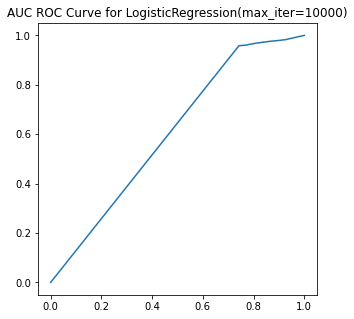

Confussion matrix: 
 [[ 1828  6864]
 [ 2135 58339]]

score:  0.8698927218575601
Cross Val Score:  0.8753011819507289
Cross Val std:  0.0010352343147855844
Diff Between score and CV score:  0.005408460093168865
__________________________________________
__________________________________________

----------------------------------
***** RandomForestClassifier() ******
----------------------------------
auc:  0.3968674327012034


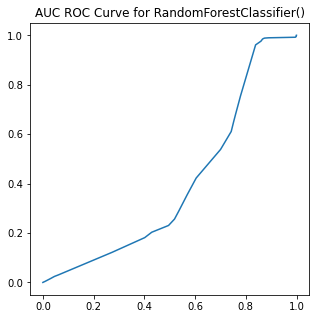

Confussion matrix: 
 [[    0  8692]
 [    3 60471]]

score:  0.8742879449440476
Cross Val Score:  0.9122203509575554
Cross Val std:  0.001227196836833905
Diff Between score and CV score:  0.03793240601350778
__________________________________________
__________________________________________

----------------------------------
***** DecisionTreeClassifier() ******
----------------------------------
auc:  0.4303335506379492


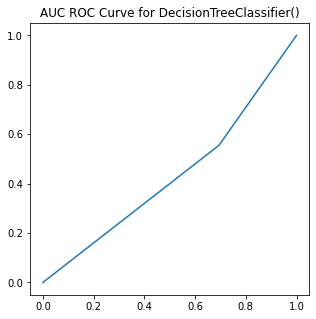

Confussion matrix: 
 [[ 2655  6037]
 [26898 33576]]

score:  0.5238267356793801
Cross Val Score:  0.8653294708734798
Cross Val std:  0.0013522712859656704
Diff Between score and CV score:  0.3415027351940997
__________________________________________
__________________________________________

----------------------------------
***** GaussianNB() ******
----------------------------------
auc:  0.6871242428335097


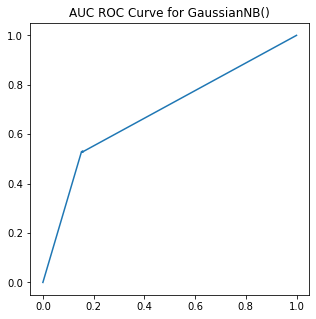

Confussion matrix: 
 [[ 7369  1323]
 [28474 32000]]

score:  0.5691958476708209
Cross Val Score:  0.5446078936206238
Cross Val std:  0.0037433517411732454
Diff Between score and CV score:  0.02458795405019709
__________________________________________
__________________________________________

----------------------------------
***** GradientBoostingClassifier() ******
----------------------------------
auc:  0.2647787180994031


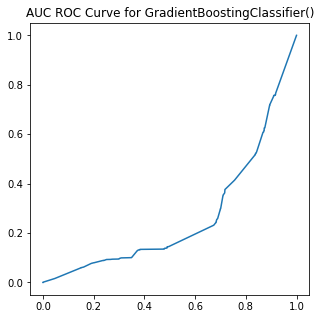

Confussion matrix: 
 [[    0  8692]
 [    1 60473]]

score:  0.8743168608854062
Cross Val Score:  0.9092288413630879
Cross Val std:  0.0009422920203360568
Diff Between score and CV score:  0.03491198047768174
__________________________________________
__________________________________________

----------------------------------
***** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:maxamnt_loans30

In [38]:
final_model_list = []
for one_model in models:
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })

In [39]:
for one in final_model_list:
    
    for key,val in one.items():
        print(key,val)
    print('-'*50)

name LogisticRegression(max_iter=10000)
accuracy_score 0.8698927218575601
mean_cv_scores 0.8753011819507289
std_cv_scores 0.0010352343147855844
diff_acc_score_cv_score 0.005408460093168865
model LogisticRegression(max_iter=10000)
--------------------------------------------------
name RandomForestClassifier()
accuracy_score 0.8742879449440476
mean_cv_scores 0.9122203509575554
std_cv_scores 0.001227196836833905
diff_acc_score_cv_score 0.03793240601350778
model RandomForestClassifier()
--------------------------------------------------
name DecisionTreeClassifier()
accuracy_score 0.5238267356793801
mean_cv_scores 0.8653294708734798
std_cv_scores 0.0013522712859656704
diff_acc_score_cv_score 0.3415027351940997
model DecisionTreeClassifier()
--------------------------------------------------
name GaussianNB()
accuracy_score 0.5691958476708209
mean_cv_scores 0.5446078936206238
std_cv_scores 0.0037433517411732454
diff_acc_score_cv_score 0.02458795405019709
model GaussianNB()
----------------

In [40]:
# Parameter Tunning 
param_grid = {
    'criterion':['gini', 'entropy'],
    'random_state':list(range(0,1)),
    'min_weight_fraction_leaf':[0.1,0.2],
}
gridSearchCV = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'random_state': [0]})

In [41]:
gridSearchCV.best_params_

{'criterion': 'gini', 'min_weight_fraction_leaf': 0.1, 'random_state': 0}

In [42]:
y_pred = gridSearchCV.best_estimator_.predict(X_test)

In [43]:
# Saving model
joblib.dump(gridSearchCV.best_estimator_,'RandomForestClassifier.obj')

['RandomForestClassifier.obj']